## Question

Objective:

The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset. 

Dataset:

Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).

Handle missing values, if any.

Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).

Convert categorical features into numerical representations if necessary.

Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.

Given a target anime, recommend a list of similar anime based on cosine similarity scores.

Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.

Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.

Analyze the performance of the recommendation system and identify areas of improvement.

Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
2. What is collaborative filtering, and how does it work?

In [22]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

In [27]:
# Read the anime file
df = pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [28]:
# Check for null values

df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
# Check for duplicates

df.duplicated().sum()

0

In [31]:
# Replace 'Unknown' with 0 in the 'episodes' column
df['episodes'].replace('Unknown', 0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Anime rating density plot')

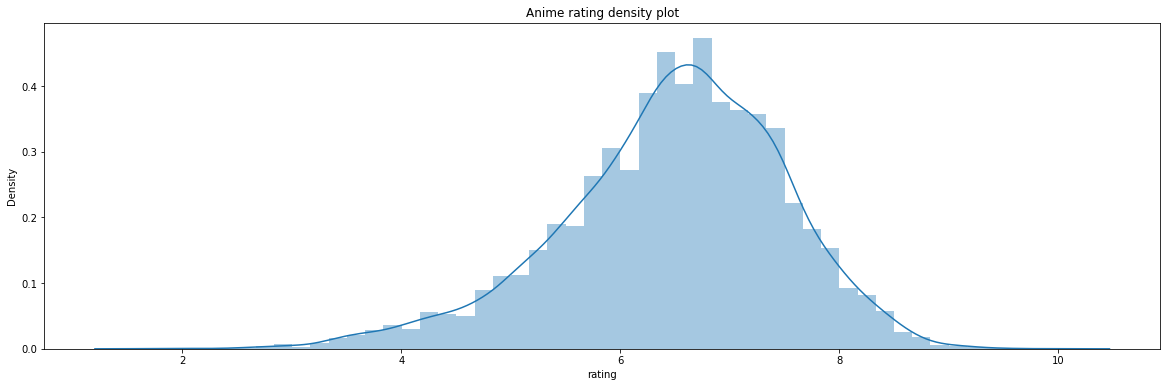

In [32]:
# EDA techniques

plt.figure(figsize=(20,6))
sns.distplot(df.rating)
plt.title('Anime rating density plot')

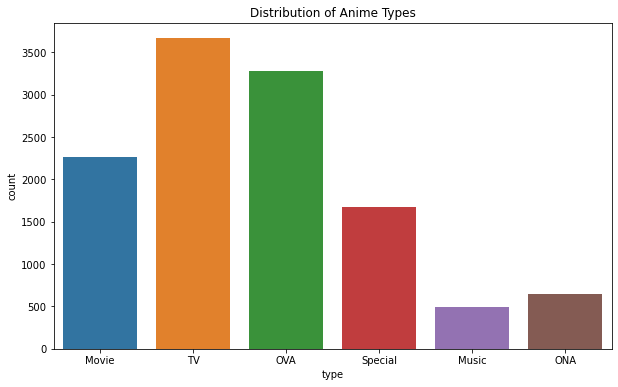

In [33]:
# Bar plot for anime types

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Anime Types')
plt.show()

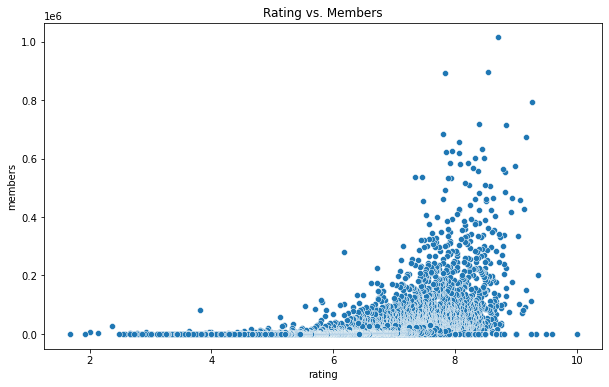

In [34]:
# Scatter plot between rating and members

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='members', data=df)
plt.title('Rating vs. Members')
plt.show()

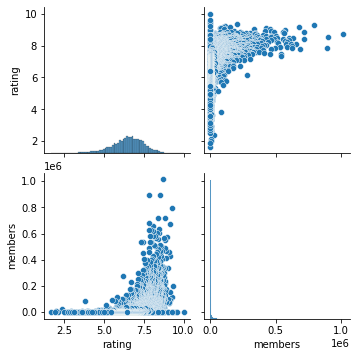

In [35]:
# Pair plot
sns.pairplot(df[['episodes', 'rating', 'members']])
plt.show()

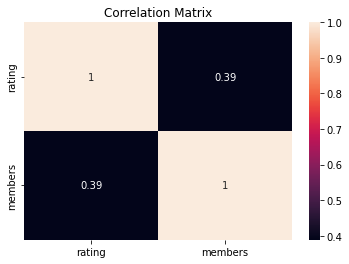

In [36]:
# Heatmap of correlation matrix
sns.heatmap(df[['episodes', 'rating', 'members']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Initiating recommendation system

# Convert genre column to list of lists
df['genre'] = df['genre'].str.split(',')

In [38]:
# Scale numerical columns
scaler = StandardScaler()

df['episodes'] = scaler.fit_transform(df[['episodes']])
df['rating'] = scaler.fit_transform(df[['rating']])
df['members'] = scaler.fit_transform(df[['members']])

In [39]:
# Create genre matrix
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_)

In [42]:
# Concatenate genre matrix with numerical columns
X = pd.concat([genre_matrix, df[numerical_cols]], axis=1)

In [43]:
# Replace NaN values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Replace infinity values with a large value
X.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)

In [44]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(X, X)

In [45]:
# Function to get recommendations
def get_recommendations(anime_name, cosine_sim, df, top_n=5):
    idx = df[df['name'] == anime_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices]

In [48]:
# Example usage

anime_name = 'Fullmetal Alchemist: Brotherhood'
recommendations = get_recommendations(anime_name, cosine_sim, df)
print(f"Recommendations for '{anime_name}':")
print(recommendations)

Recommendations for 'Fullmetal Alchemist: Brotherhood':
200    Fullmetal Alchemist
86      Shingeki no Kyojin
775         Akame ga Kill!
440             Soul Eater
339               Noragami
Name: name, dtype: object


In [49]:
def evaluate_recommendation_system(recommendations, relevant_items):
    # Calculate precision
    precision = len(set(recommendations) & set(relevant_items)) / len(recommendations)
    
    # Calculate recall
    recall = len(set(recommendations) & set(relevant_items)) / len(relevant_items)
    
    # Calculate F1-score
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1_score

In [52]:
# Example usage
relevant_items = ['Fullmetal Alchemist: Brotherhood', 'Soul Eater', 'Akame ga Kill!']

precision, recall, f1_score = evaluate_recommendation_system(recommendations, relevant_items)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

Precision: 0.40
Recall: 0.67
F1-score: 0.50


## Interview Question: Answers

Collaborative Filtering (CF) is a technique used by recommendation systems to provide personalized recommendations to users. It works by leveraging the preferences and behaviors of a group of users (the "community") to make recommendations for individual users.

User-Based Collaborative Filtering:

In user-based CF, recommendations are based on the similarity of users' preferences.

The assumption is that users who have similar tastes in the past will have similar tastes in the future.

To make a recommendation for a user, the system identifies users who are similar to that user based on their past interactions (e.g., ratings, purchases) and recommends items that those similar users have liked but the target user has not yet interacted with.

Item-Based Collaborative Filtering:

In item-based CF, recommendations are based on the similarity between items.

The assumption is that if a user likes one item, they are likely to like similar items.

To make a recommendation for a user, the system identifies items similar to the ones the user has liked in the past and 
recommends those similar items.

Difference:

The main difference between user-based and item-based CF is in what is used as the basis for similarity: user preferences or item characteristics.

User-based CF tends to work well in situations where there is a lot of user data and users' preferences are stable over time.

Item-based CF can be more computationally efficient and can work well when there are many items in the dataset.

How Collaborative Filtering Works:

Data Collection: The system collects data on user interactions with items (e.g., ratings, purchases).

Similarity Calculation: For user-based CF, the system calculates the similarity between users based on their interactions with items. For item-based CF, the system calculates the similarity between items based on how users have interacted with them.

Recommendation Generation: To generate recommendations for a user, the system identifies similar users or items and recommends items that those similar users have liked or items similar to those the user has liked in the past.

Feedback Incorporation: As users interact with the recommended items, their feedback is incorporated back into the system to improve future recommendations.